In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 18,
    'figure.dpi': 100,
    'legend.loc': 'upper left',
})

sns.set_style("white")

In [23]:
df = pd.read_csv('training_metrics_call_tanh_6_148_50000.csv')
df['wpde_loss'] = df['pde_weight'] * df['pde_loss']
df['data_loss'] = df['market_loss'] + df['tc_loss'] + df['bc_loss']

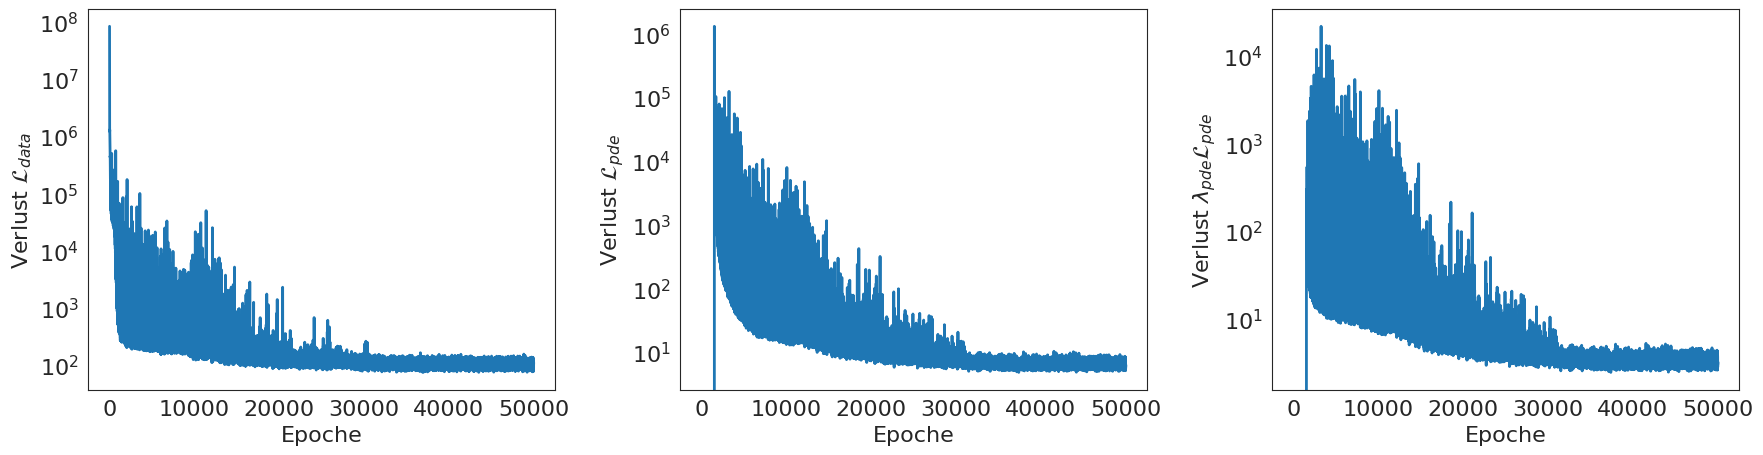

In [25]:
metrics = ['data_loss', 'pde_loss', 'wpde_loss']
metrics_names = [
    r'Verlust $\mathcal{L}_{data}$',
    r'Verlust $\mathcal{L}_{pde}$',
    r'Verlust $\lambda_{pde}\mathcal{L}_{pde}$'
]

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for ax, metric, name in zip(axes, metrics, metrics_names):
    ax.plot(df.index, df[metric], label=name, linewidth=2)
    ax.set_yscale('log')
    ax.set_xlabel('Epoche')
    ax.set_ylabel(name)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("calldatapdeloss.pdf", bbox_inches="tight")
plt.show()

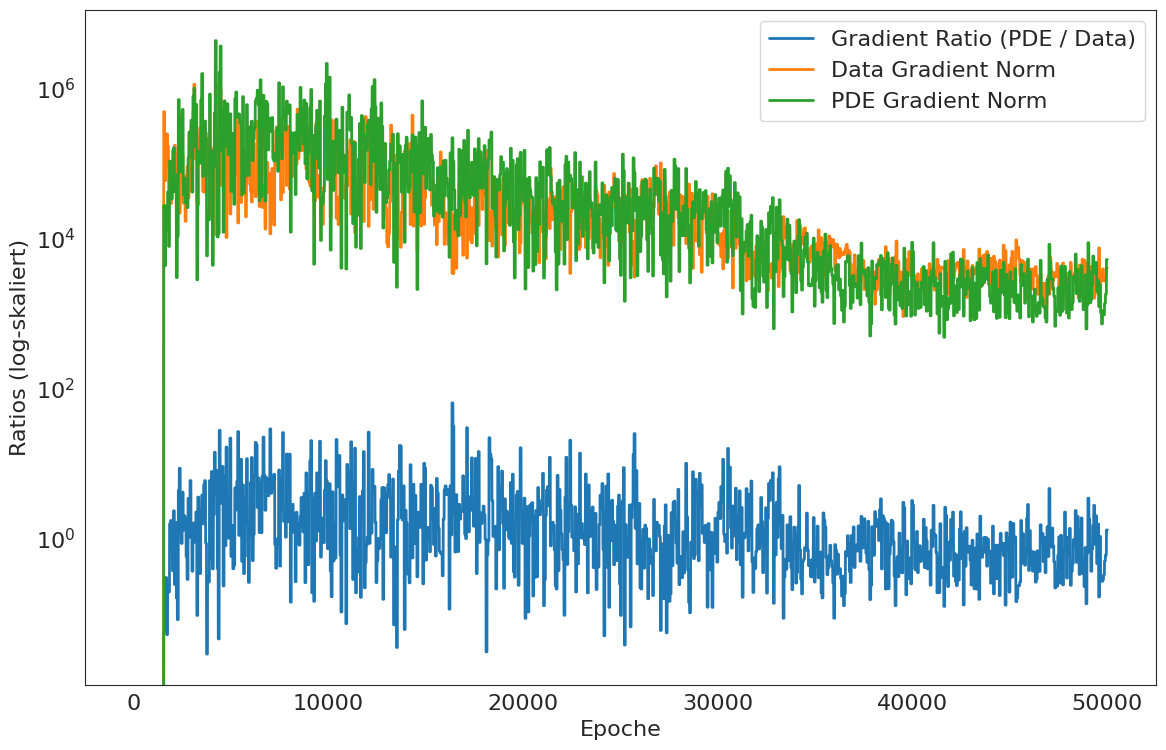

In [26]:
metrics = ['grad_ratio',
           'grad_norm_data',
           'grad_norm_pde']

metrics_names = [
    'Gradient Ratio (PDE / Data)',
    'Data Gradient Norm',
    'PDE Gradient Norm']

fig, ax = plt.subplots(figsize=(12, 8))

for metric, label in zip(metrics, metrics_names):
    ax.plot(df.index, df[metric], label=label, linewidth=2)

ax.set_xlabel('Epoche')
ax.set_ylabel('Ratios (log-skaliert)')
ax.set_yscale('log')
ax.legend(loc='upper right')
#ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("callgradient.pdf", bbox_inches="tight")
plt.show()

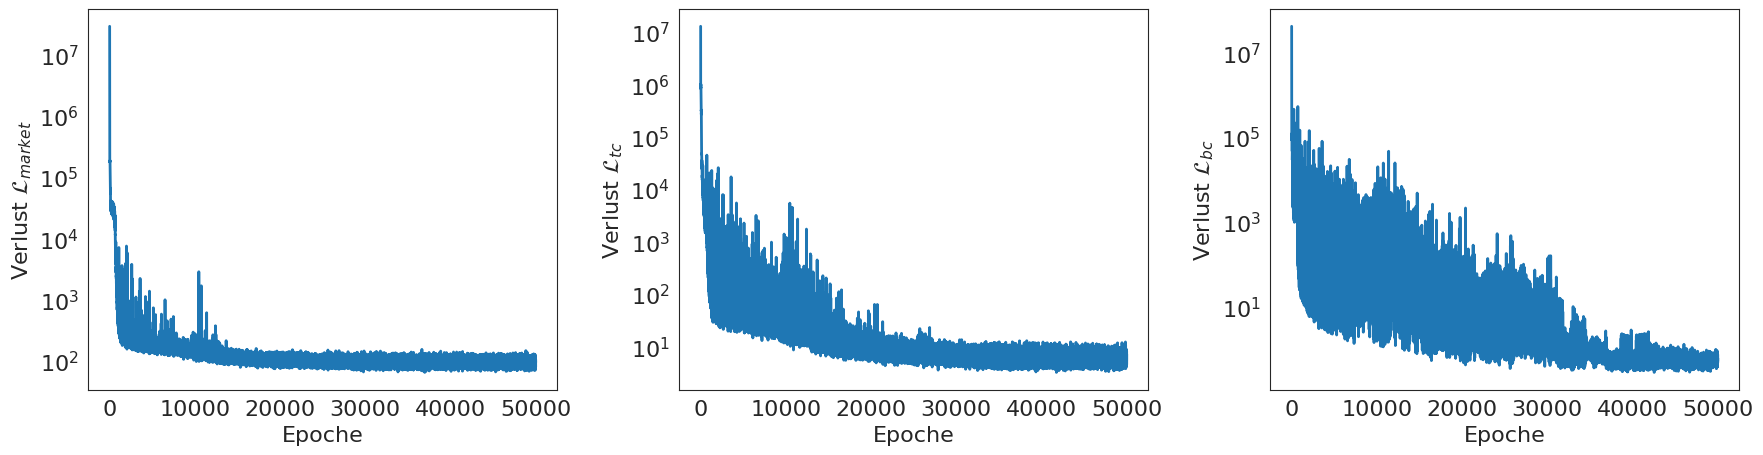

In [27]:
metrics = ['market_loss', 'tc_loss', 'bc_loss']
metrics_names = [
    r'Verlust $\mathcal{L}_{market}$',
    r'Verlust $\mathcal{L}_{tc}$',
    r'Verlust $\mathcal{L}_{bc}$'
]

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for ax, metric, name in zip(axes, metrics, metrics_names):
    ax.plot(df.index, df[metric], label=name, linewidth=2)
    ax.set_yscale('log')
    ax.set_xlabel('Epoche')
    ax.set_ylabel(name)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("callmarkettcbcloss.pdf", bbox_inches="tight")
plt.show()

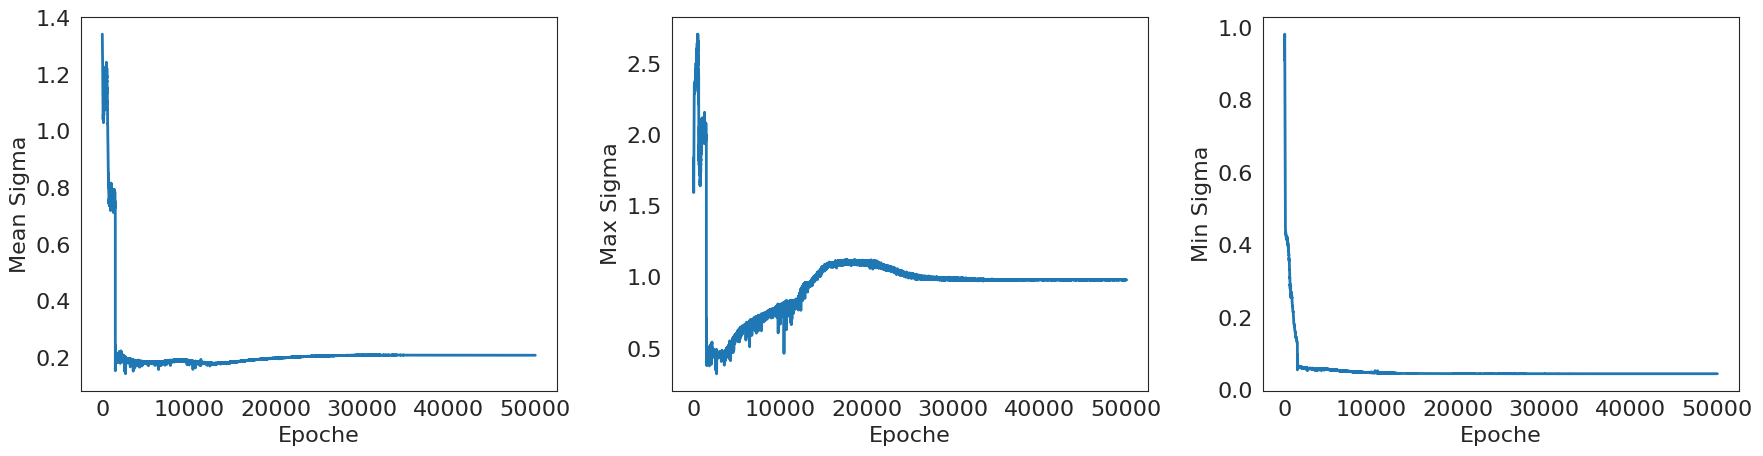

In [29]:
df_filtered = df[df.index >= 1]

metrics = ['mean_sigma', 'max_sigma', 'min_sigma']
metrics_names = ['Mean Sigma', 'Max Sigma', 'Min Sigma']

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for ax, metric, name in zip(axes, metrics, metrics_names):
    ax.plot(df_filtered.index, df_filtered[metric], label=name, linewidth=2)
    #ax.set_yscale('log')
    ax.set_xlabel('Epoche')
    ax.set_ylabel(name)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("callsigma.pdf", bbox_inches="tight")
plt.show()

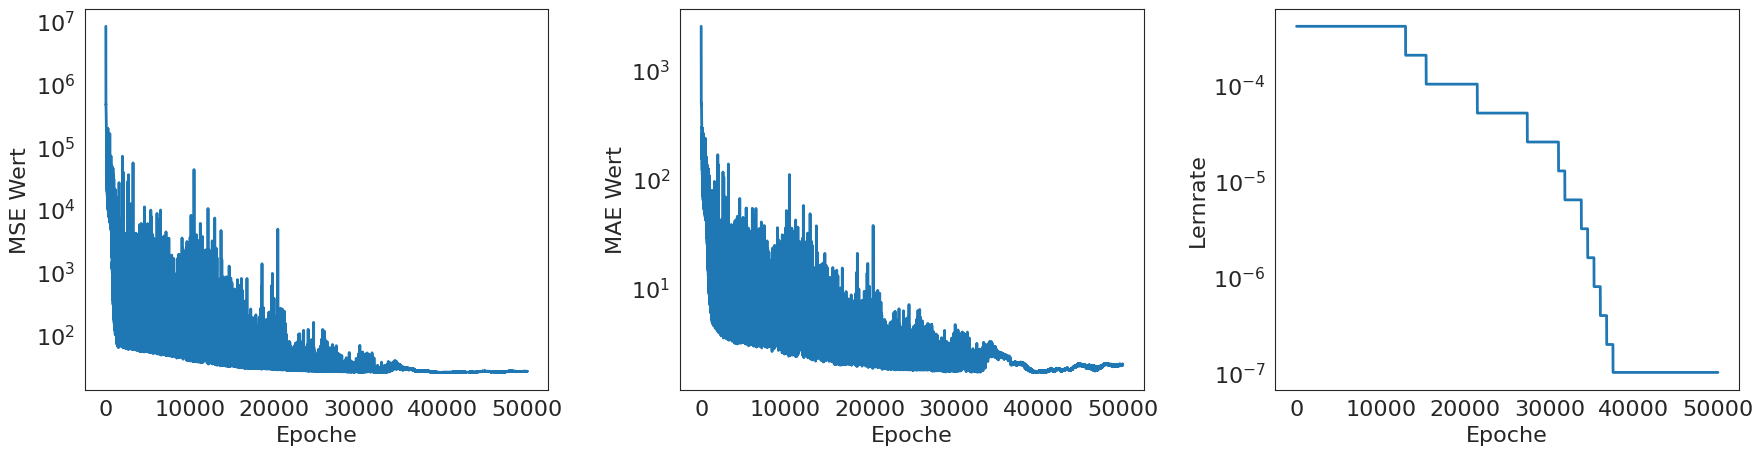

In [30]:
df_filtered = df[df.index >= 1]

metrics = ['mse_val', 'mae_val', 'learning_rate']
metrics_names = ['MSE Wert', 'MAE Wert', 'Lernrate']

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for ax, metric, name in zip(axes, metrics, metrics_names):
    ax.plot(df_filtered.index, df_filtered[metric], label=name, linewidth=2)
    #ax.set_title(name)
    ax.set_yscale('log')
    ax.set_xlabel('Epoche')
    ax.set_ylabel(name)


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("callmsemaelearningrate.pdf", bbox_inches="tight")
plt.show()